# Lineare Regression mit Gradient Descent

## 1. Daten laden

Sie lernen hier, wie man eine lineare Regression mittels **Gradient Descent** durchführt, um aus Messdaten die Schallgeschwindigkeit zu bestimmen.\
Die Datei `schall.txt` enthält Messwerte, jeweils zwei durch Komma getrennte Zahlen pro Zeile:

- **f** – Frequenz in Hz
- **1/λ** – Kehrwert der Wellenlänge in 1/m


In [ ]:
import numpy as np

# Daten einlesen
data = np.loadtxt('schall.txt', delimiter=',')
X = data[:, 0]      # Frequenzen
y = data[:, 1]      # 1/Lambda

# Modellparameter initialisieren
w = 0.0   # Steigung
b = 0.0   # Achsenabschnitt

Die Modellparameter definieren einer linearen Funktion: $f_{w,b}{x} = w x + b$

In [ ]:
# prompt: def fwb(w,b,x):

def fwb(w,b,x):
  """
  Calculates the linear function f(x) = wx + b.

  Args:
    w: The slope of the line.
    b: The y-intercept of the line.
    x: The input value (x-coordinate).

  Returns:
     The calculated value of the linear function.
  """
  return w * x + b


## 2. Daten visualisieren

Ein **Scatter‑Plot** hilft, einen ersten Eindruck vom Zusammenhang zwischen der Frequenz $\nu$ und $\frac{1}{\lambda}$ zu bekommen.

Wir zeichnen außerdem eine Gerade, die durch unser aktuelles Modell $f_{w,b}(x)=w·x+b$ definiert ist.

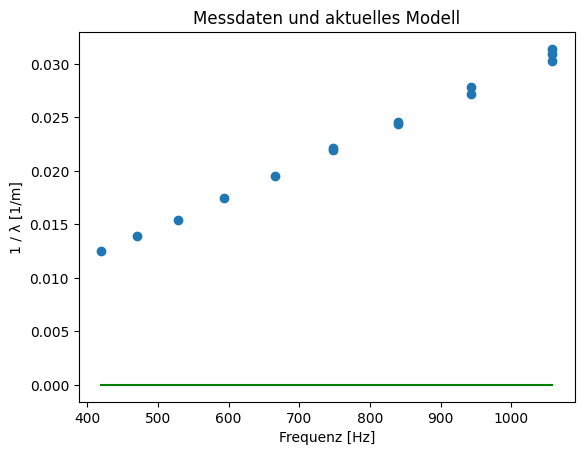

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
x_plot = np.linspace(X.min(), X.max(), 100)
y_plot = fwb(w,b,x_plot)
plt.plot(x_plot, y_plot,c='g')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('1 / λ [1/m]')
plt.title('Messdaten und aktuelles Modell')
plt.show()

### AUFGABE
> Änderen Sie die Werte von `w` und `b` hierunter, um ein besseres Modell (grüne Linie) per Hand zu finden, und führen Sie die obige Zelle erneut aus, um den Graphen zu zeichnen.

In [ ]:
#***** ÄNDEREN SIE DIE WERTE VON w UND b *****
w = 0
b = 0

## 3. Kostenfunktion

Um das Modell systematisch zu verbessern, brauchen wir eine **Kostenfunktion**.\
Die Kostenfunktion für einen bestimmten Wert der Parameter $w$ und $b$ beträgt

$$
J(w,b)=\frac{1}{2m}\,\displaystyle\sum_{i=1}^m (f_{w,b}(x)-y)^2
$$

wobei $m$ die Anzahl der Datenpunkte ist.

###AUFGABE
> Implementieren Sie die Funktion `cost_point(w, b, x, y)`, die die Kosten eines einzelnen Datenpunktes $(x,y)$ bestimmt, mit der Formel:
$$\text{cost_point(w,b,x,y)} = \dfrac{1}{2} \left(f_{w,b}(x)-y\right)^2$$

In [ ]:
# TODO: Implementiere cost_point
def cost_point(w: float, b: float, x: float, y: float) -> float:
    pass

### Lösung

In [ ]:
def cost_point(w: float, b: float, x: float, y: float) -> float:
    return 0.5 * (fwb(w,b,x) - y)**2

Die Kostenfunktion `cost(w,b)` erhalten wir durch Summieren über alle Punkte und teilen durch die Anzahl Punkte:

In [ ]:
def cost(w: float, b: float) -> float:
    return sum(cost_point(w, b, X, Y)) / X.shape[0]

## 4. Visualisierung der Kostenfunktion als Kontourdiagramm

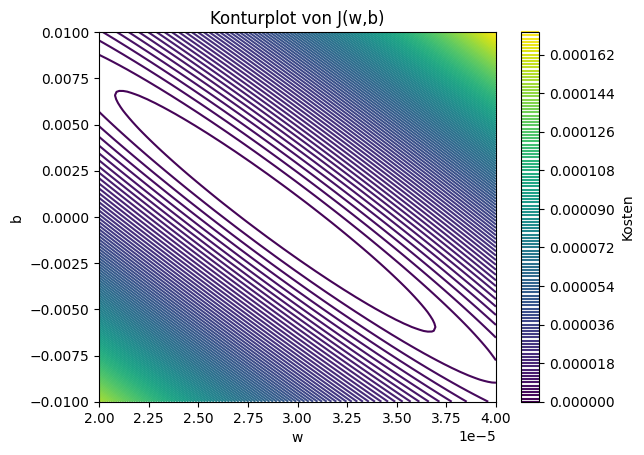

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogLocator

# Definiere den Bereich der Werte für w und b
w_range = np.linspace(0.00002, 0.00004, 100)  # w-Werte von -0.00001 bis 0.0001, 100 Schritte
b_range = np.linspace(-0.01, 0.01, 100)  # b-Werte von -0001 bis 0.0001, 100 Schritte

# Erstelle ein Gitter aus w- und b-Werten
W, B = np.meshgrid(w_range, b_range)  # Kombiniert w- und b-Werte zu einem Gitter

# Berechne die Werte von J(w,b) für jeden Punkt im Gitter
Z = np.zeros_like(W)  # Erstelle ein Array mit der gleichen Form wie W, gefüllt mit Nullen
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Z[i, j] = cost(W[i, j], B[i, j])  # Berechne die Kosten für jeden Punkt (w, b)

# Zeichne den Konturplot
# plt.contour(W, B, Z, levels=20)  # Zeichnet den Konturplot mit 20 Höhenlinien
# Erstelle den gefüllten Konturplot mit Farbverlauf
plt.contour(W, B, Z, levels=150, cmap='viridis')  # 'viridis' ist ein Beispiel für eine Colormap
plt.colorbar(label='Kosten')  # Fügt eine Colorbar hinzu

plt.xlabel('w')  # Beschriftung der x-Achse
plt.ylabel('b')  # Beschriftung der y-Achse
plt.title('Konturplot von J(w,b)')  # Titel des Plots
plt.show()  # Zeigt den Plot an

## 5. Gradient

Der Gradient der Kostenfunktion bezüglich $w$ und $b$ lautet

$$
\begin{aligned}
\frac{\partial}{\partial w} J(w,b) &= \dfrac{1}{m}\displaystyle\sum_{i=1}^m (f_{w,b}(X_i) - Y_i)\,X_i,\\[2mm]
\frac{\partial}{\partial b} J(w,b) &= \dfrac{1}{m}\displaystyle\sum_{i=1}^m (f_{w,b}(X_i) - Y_i)\,.
\end{aligned}
$$


###AUFGABE
> Implementieren Sie die Funktion `gradient_point(i, w, b)`, die den Gradienten der Kosten eines einzelnen Datenpunktes $(x,y)$ bestimmt, mit der Formel:
>
> $$\text{gradient_point(w,b,x,y)} = \begin{bmatrix}\left(f_{w,b}(x)-y\right)x \\ f_{w,b}(x)-y\end{bmatrix}$$
>
> Sie liefert den Gradienten als ein Tuple zurück.

In [ ]:
# TODO: Implementiere gradient_point
def gradient_point(w: float, b: float, x: float, y: float) -> tuple[float,float]:
    pass


###Lösung

In [ ]:
def gradient_point(w: float, b: float, x: float, y: float) -> tuple[float,float]:
    error = w * x + b - y
    return error * x, error


Wir definieren die Funktion `gradient(w,b)`, um den mittleren Gradienten über all Punkte zu bestimmen:

In [ ]:
def gradient(w: float, b: float) -> tuple[float,float]:
    dw,db = gradient_point(w,b,X,Y)
    return sum(dw)/X.shape[0],sum(db)/X.shape[0]


## 5  Gradientenverfahren (Gradient Descent)

Ein **Gradienten‑Schritt** aktualisiert die Parameter um

$$
w' = w - \alpha\,\nabla_w, \qquad
b' = b - \alpha\,\nabla_b,
$$

wobei $\alpha$ die **Lernrate** ist.


###AUFGABE
> Implementieren Sie `gradient_step(w, b, alpha)`, die einen Gradienten-Schritt ausführt und $w'$ und $b'$ als Tuple zurückliefert. `gradient_step(w,b,alpha)` sollte die Funktion `gradient(w,b)` verwenden, um den Gradient zu bestimmen.



In [ ]:
# TODO: Implementieren Sie gradient_step
def gradient_step(w: float, b: float, alpha: float) -> tuple[float, float]:
    pass


### Lösung

In [ ]:
def gradient_step(w: float, b: float, alpha: float) -> tuple[float, float]:
    grad_w, grad_b = gradient(w, b)
    return w - alpha * grad_w, b - alpha * grad_b

Die Funktion `gradient_descent(w_start, b_start, alpha, prec, max_iter)` macht einen vollständigen Ablauf des Gradientenverfahrens mit Abbruchkriterium:

In [ ]:
def gradient_descent(w_start: float, b_start: float, alpha: float,
                     prec: float = 1e-8, max_iter: int = 10_000) -> tuple[float, float]:
    w, b = w_start, b_start
    for _ in range(max_iter):
        w_new, b_new = gradient_step(w, b, alpha)
        if abs(w_new - w) < prec and abs(b_new - b) < prec:
            break
        w, b = w_new, b_new
    return w, b

## 6. Training ausführen und Ergebnis visualisieren

Optimales w: 2.9236e-05, optimales b: 3.5080e-08
Kosten bei der optimalen Lösung: 3.5550e-08
Geschätzte Schallgeschwindigkeit: 342.05 m/s


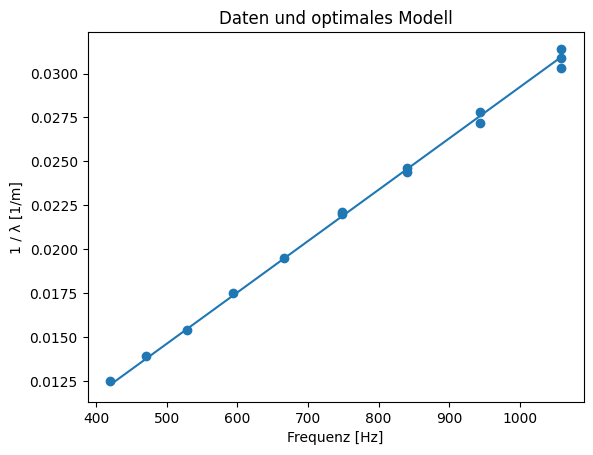

In [ ]:
w_opt, b_opt = gradient_descent(0., 0., alpha=1e-6)
print(f'Optimales w: {w_opt:.4e}, optimales b: {b_opt:.4e}')
print(f'Kosten bei der optimalen Lösung: {cost(w_opt, b_opt):.4e}')
v = 1 / w_opt/100. if w_opt!=0 else float('inf')   # Schallgeschwindigkeit
print(f'Geschätzte Schallgeschwindigkeit: {v:.2f} m/s')

plt.scatter(X, Y)
plt.plot(x_plot, w_opt * x_plot + b_opt)
plt.xlabel('Frequenz [Hz]')
plt.ylabel('1 / λ [1/m]')
plt.title('Daten und optimales Modell')
plt.show()

###AUFGABE
> Experimentieren Sie:
>
> - Passen Sie die Lernrate `alpha` an und beobachten Sie den Einfluss auf die Konvergenz.
> - Starten Sie mit unterschiedlichen Anfangswerten von `w` und `b`.
> - Vergleichen Sie die geschätzte Schallgeschwindigkeit mit dem Literaturwert (\~343 m/s bei 20 °C).

## 7.  Geschlossene ("Closed-Form") Lösung der linearen Regression
### 7.1  Theorie-Normalengleichung
Die lineare Regression hat auch eine geschlossene Lösung (das heisst, eine exakte Lösung kann berechnet werden, ohne annährende Verfahren). Für den Spezialfall *einer* erklärenden Variable $x$ lassen sich die optimalen Parameter $f(x)=wx+b$ durch Minimieren der mittleren quadratischen Abweichung ohne iterative Suche direkt berechnen.

1. Sei $X$ die Matrix der $x$-Koordinaten und $y$ die Matrix der
$y$-Koordinaten, das heisst, die Resulate der Beobachtungen. Wir suchen ein Modell $f(x)$, das Näherungsweise die Resultate erklären. Um die Beziehung mmit Matrizen ausdrücken zu können, erweitern wir die Matrix $X$ um eine Spalte Einsen, sodass

$\tilde{X} = \begin{bmatrix}x_1 & 1\\... & ...\\ x_m & 1\end{bmatrix}, \theta = \begin{bmatrix}w\\b\end{bmatrix}, y = \begin{bmatrix}y_1\\...\\y_m\end{bmatrix}$,
wobei $m$ die Anzahl Datenpunkte ist.

2. Die Kostenfunktion in Matrixform lautet
$J(\theta) = \tfrac{1}{2} \lVert\tilde{X} \theta - y\rVert^2$.

3. Durch Nullsetzen des Gradienten erhält man die **Normalengleichung**

$\tilde{X}^T \tilde{X} \theta = \tilde{X}^T y \implies \theta = \left(\tilde{X}^T \tilde{X}\right)^{-1} \tilde{X}^T y$

Damit sind $w$ und $b$ **in einem Schritt** exakt bestimmt.

**Rechenaufwand**

*   Matrixmultiplikation / -Inversion für eine $(d+1)\times(d+1)$-Matrix kostet $O\left(d^3\right)$.
*   Für wenige Variablen ($d\ll m$) und einen moderaten Datensatz ($m\lesssim 10^4$) ist das meist schneller, einfacher – und benötigt **keine** Lernrate.

## 7.2 Warum Gradient Descent?
- Für moderne ML‑Aufgaben mit tausenden Merkmalen ($d \approx 10^3 - 10^6$) und **hunderttausenden** Datenpunkten ($m \gg d$) wird $(\tilde{X}^T \tilde{X})^{-1}$ zu gross, die Inversion speicher- und zeitintensiv.
- Gradient-Descent (oder **Stochastic Gradient Descent** SG-D) skaliert mit $O(k m d)$ für $k$ Iterationen, vermeidet die Matrixinversion und lässt sich leicht **inkrementell** oder **mini-batch**-weise ausführen.

## 7.3 Python-Beispiel -- Closed-Form


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# X: Spaltenvektor der Frequenzen, y: 1/Lambda
X_ = X.reshape(-1, 1)          # scikit‑learn erwartet 2‑D‑Array
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X_, y)

w_cf = linreg.coef_[0]         # Steigung
b_cf = linreg.intercept_       # Achsenabschnitt
v_cf = 1 / w_cf / 100.                # Schallgeschwindigkeit

print(f"Closed‑Form‑Lösung:  w = {w_cf:.4e},  b = {b_cf:.4e}")
print(f'Kosten bei der optimalen Lösung: {cost(w_cf, b_cf):.4e}')
print(f"Geschätzte Schallgeschwindigkeit (Closed‑Form): {v_cf:.2f} m/s")

Closed‑Form‑Lösung:  w = 2.8876e-05,  b = 3.0630e-04
Kosten bei der optimalen Lösung: 3.2306e-08
Geschätzte Schallgeschwindigkeit (Closed‑Form): 346.31 m/s


*LinearRegression nutzt intern genau die Normalengleichung, fällt aber bei grossen $d$ automatisch auf numerisch stabile Verfahren (SVD) zurück.*

## 7.4 Python‑Beispiel — Gradient Descent mit scikit‑learn

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Pipeline: Standardisierung + SGD‑Regressor (MSE‑Loss)
sgd_reg = make_pipeline(
    StandardScaler(with_mean=False),
    SGDRegressor(loss="squared_error",
                 learning_rate="invscaling",       # automatische α‑Anpassung
                 eta0=1e-2,                        # Start‑Lernrate
                 max_iter=1000,
                 tol=1e-8,
                 random_state=42)
)

sgd_reg.fit(X_, y)
w_gd = sgd_reg.named_steps["sgdregressor"].coef_[0]
b_gd = sgd_reg.named_steps["sgdregressor"].intercept_[0]
v_gd = 1 / w_gd / 100

print(f"Gradient‑Descent‑Lösung:  w = {w_gd:.4e},  b = {b_gd:.4e}")
print(f"Geschätzte Schallgeschwindigkeit (GD): {v_gd:.2f} m/s")

Gradient‑Descent‑Lösung:  w = 5.8136e-03,  b = 1.5307e-03
Geschätzte Schallgeschwindigkeit (GD): 1.72 m/s


Der Regressor optimiert mit **Stochastic Gradient Descent** und wählt die Lernrate $\alpha$ adaptiv, verhindert Divergenz und ist auf sehr grosse Datensätze skalierbar.
